<a href="https://colab.research.google.com/github/zeeba-tech/data-science/blob/main/mean_shiftalgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math, matplotlib.pyplot as plt, operator, torch
from functools import partial

In [2]:
from torch.distributions.multivariate_normal import MultivariateNormal
from torch import tensor

In [3]:
torch.manual_seed(42)
torch.set_printoptions(precision=3, linewidth=140, sci_mode=False)

In [4]:
n_clusters=5
n_samples =200

In [5]:
centroids = torch.rand(n_clusters, 2)*70-35 #(n_clusters,2(dimension x axis and y axis))

In [6]:
centroids

tensor([[ 26.759,  29.050],
        [ -8.200,  32.151],
        [ -7.669,   7.063],
        [-17.040,  20.555],
        [ 30.854, -25.677]])

In [7]:

def sample(m): return MultivariateNormal(m, torch.diag(tensor([5.,5.]))).sample((n_samples,))#250 (mean,standard deviation)

In [8]:
torch.diag(tensor([5.,5.]))#converts one dimension -2 dimension

tensor([[5., 0.],
        [0., 5.]])

In [9]:
MultivariateNormal(centroids, torch.diag(tensor([5.,5.]))).sample((n_samples,))#(mean,standard deviation)and taking samples

tensor([[[ 26.216,  26.961],
         [ -8.755,  29.450],
         [ -8.737,   8.226],
         [-13.368,  20.198],
         [ 36.048, -27.831]],

        [[ 31.236,  30.093],
         [ -4.682,  30.088],
         [ -4.808,   9.962],
         [-18.143,  21.095],
         [ 28.370, -25.472]],

        [[ 21.578,  28.565],
         [-11.296,  30.203],
         [ -5.872,   5.673],
         [-18.364,  20.414],
         [ 29.001, -24.937]],

        ...,

        [[ 24.029,  26.108],
         [-12.243,  31.078],
         [ -6.025,   6.460],
         [-15.044,  23.620],
         [ 32.603, -26.368]],

        [[ 28.214,  25.589],
         [-11.091,  34.118],
         [ -7.743,   6.630],
         [-18.755,  22.884],
         [ 29.526, -27.892]],

        [[ 24.539,  28.478],
         [ -8.703,  33.765],
         [ -7.387,  10.205],
         [-16.604,  19.495],
         [ 31.139, -24.313]]])

In [10]:
slices = [sample(c) for c in centroids]
data = torch.cat(slices)#concatenates given sequence of tensor in given dimension 
data.shape

torch.Size([1000, 2])

In [11]:
data

tensor([[ 25.900,  26.989],
        [ 25.669,  27.916],
        [ 27.994,  29.187],
        ...,
        [ 30.876, -25.741],
        [ 29.750, -26.333],
        [ 25.716, -25.140]])

In [12]:
def plot_data(centroids, data, n_samples, ax=None):
    if ax is None: _,ax = plt.subplots()
    for i, centroid in enumerate(centroids):
        samples = data[i*n_samples:(i+1)*n_samples]
        ax.scatter(samples[:,0], samples[:,1], s=1)
        ax.plot(*centroid, markersize=10, marker="x", color='k', mew=5)
        ax.plot(*centroid, markersize=5, marker="x", color='m', mew=2)

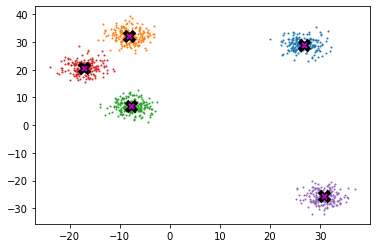

In [13]:
plot_data(centroids, data, n_samples)

mean shift

In [14]:
midp=data.mean(0)
midp

tensor([ 4.854, 12.673])

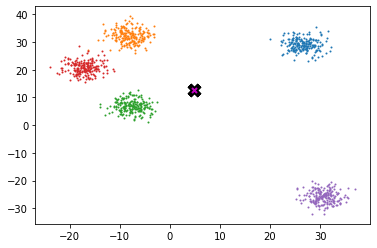

In [15]:
plot_data([midp]*5,data,n_samples)

In [16]:
[midp]*5

[tensor([ 4.854, 12.673]),
 tensor([ 4.854, 12.673]),
 tensor([ 4.854, 12.673]),
 tensor([ 4.854, 12.673]),
 tensor([ 4.854, 12.673])]

In [17]:
def gaussian(d, bw): return torch.exp(-0.5*((d/bw))**2) / (bw*math.sqrt(2*math.pi))

In [18]:
def plot_func(f):
    x = torch.linspace(0,10,100)#(0,10)0-10 axis 100 spaced
    plt.plot(x, f(x))

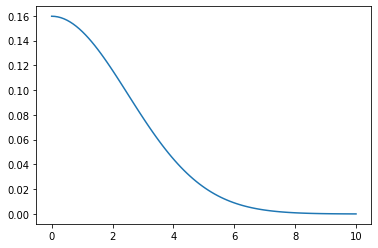

In [19]:
plot_func(partial(gaussian, bw=2.5))

In [20]:
f=partial(gaussian,bw=2.5)

In [21]:
f(tensor(4.))

tensor(0.044)

In [22]:
def tri(d, i): return (-d+i).clamp_min(0)/i

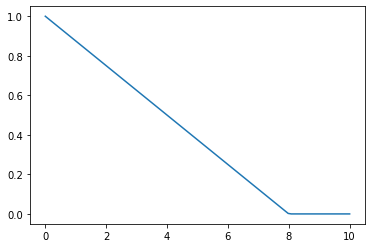

In [23]:
plot_func(partial(tri, i=8))

In [24]:
X=data.clone()
x=data[0]#first tensor row


In [25]:
x

tensor([25.900, 26.989])

In [26]:
x.shape,X.shape

(torch.Size([2]), torch.Size([1000, 2]))

In [27]:
(x-X)[:6]#For each data point x in the sample X, find the distance between that point x and every other point in X

tensor([[ 0.000,  0.000],
        [ 0.231, -0.926],
        [-2.094, -2.198],
        [ 1.278, -0.321],
        [-3.976, -1.445],
        [ 0.296, -2.407]])

In [28]:
# rewrite using torch.einsum
dist = ((x-X)**2).sum(1).sqrt()#euclidian distance
dist[:6]

tensor([0.000, 0.955, 3.035, 1.318, 4.231, 2.425])

In [29]:
weight=gaussian(dist,2.5)
weight

tensor([    0.160,     0.148,     0.076,     0.139,     0.038,     0.100,     0.087,     0.040,     0.068,     0.026,     0.027,     0.067,
            0.049,     0.024,     0.058,     0.059,     0.120,     0.029,     0.038,     0.116,     0.132,     0.058,     0.045,     0.089,
            0.083,     0.159,     0.108,     0.003,     0.107,     0.118,     0.042,     0.142,     0.129,     0.027,     0.034,     0.113,
            0.032,     0.139,     0.003,     0.007,     0.025,     0.032,     0.127,     0.082,     0.059,     0.090,     0.041,     0.075,
            0.067,     0.048,     0.122,     0.144,     0.126,     0.142,     0.109,     0.135,     0.029,     0.024,     0.138,     0.008,
            0.020,     0.068,     0.007,     0.031,     0.037,     0.055,     0.004,     0.088,     0.090,     0.075,     0.088,     0.000,
            0.009,     0.021,     0.100,     0.065,     0.047,     0.069,     0.052,     0.153,     0.086,     0.153,     0.046,     0.103,
            0.047,  

In [30]:
weight.shape,X.shape

(torch.Size([1000]), torch.Size([1000, 2]))

In [31]:
weight[:,None].shape#when mutiplied weight and X should have same dimension

torch.Size([1000, 1])

In [32]:
weight[:,None]*X#Create weights for each point in X by using the Gaussian kernel of that point's distance to x

tensor([[4.133, 4.307],
        [3.808, 4.141],
        [2.138, 2.229],
        ...,
        [0.000, -0.000],
        [0.000, -0.000],
        [0.000, -0.000]])

In [33]:
def one_update(X):
    for i, x in enumerate(X):
        dist = torch.sqrt(((x-X)**2).sum(1))
#         weight = gaussian(dist, 2.5)
        weight = tri(dist, 8)
        X[i] = (weight[:,None]*X).sum(0)/weight.sum()# weighted average=summation of weights * X(all data points)/summation of all weights

In [34]:
def meanshift(data):
    X = data.clone()
    for it in range(5): 
      one_update(X)
    return X

In [35]:
 %time X=meanshift(data)

CPU times: user 539 ms, sys: 4.8 ms, total: 544 ms
Wall time: 549 ms


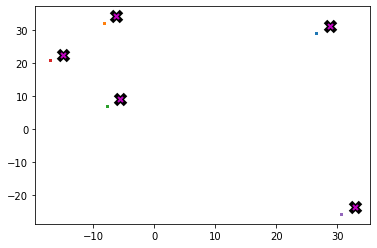

In [36]:
plot_data(centroids+2,X,n_samples)

Animation

In [42]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [43]:
def do_one(d):
    if d: one_update(X)
    ax.clear()
    plot_data(centroids+2, X, n_samples, ax=ax)

In [44]:
# create your own animation
X = data.clone()
fig,ax = plt.subplots()
ani = FuncAnimation(fig, do_one, frames=5, interval=500, repeat=False)
plt.close()
HTML(ani.to_jshtml())

GPU batched algorithm

In [45]:
bs=5
X=data.clone()
x=X[:bs]
x.shape,X.shape

(torch.Size([5, 2]), torch.Size([1000, 2]))

In [58]:
#X-x

In [59]:
def dist_b(a,b): return (((a[None]-b[:,None])**2).sum(2)).sqrt()

In [60]:
X[None,:].shape ,x[:,None].shape

(torch.Size([1, 1000, 2]), torch.Size([5, 1, 2]))

In [61]:
(X[None,:]-x[:,None]).shape

torch.Size([5, 1000, 2])

In [62]:
dist_b(X,x).shape

torch.Size([5, 1000])

In [63]:
weight=gaussian(dist_b(X,x),2)
weight

tensor([[0.109, 0.109, 0.109,  ..., 0.000, 0.000, 0.000],
        [0.152, 0.152, 0.152,  ..., 0.000, 0.000, 0.000],
        [0.155, 0.155, 0.155,  ..., 0.000, 0.000, 0.000],
        [0.084, 0.084, 0.084,  ..., 0.000, 0.000, 0.000],
        [0.048, 0.048, 0.048,  ..., 0.000, 0.000, 0.000]])

In [64]:
weight.shape,X.shape

(torch.Size([5, 1000]), torch.Size([1000, 2]))

In [65]:
weight[...,None].shape,X[None,::].shape#weight[:,:,None]

(torch.Size([5, 1000, 1]), torch.Size([1, 1000, 2]))

In [66]:
num=(weight[...,None]*X[None,::]).sum(1)
num.shape

torch.Size([5, 2])

In [67]:
num

tensor([[578.448, 633.219],
        [807.053, 883.469],
        [821.710, 899.515],
        [444.837, 486.957],
        [256.343, 280.615]])

In [68]:
torch.einsum('ij,jk->ik',weight,X)

tensor([[578.448, 633.219],
        [807.052, 883.469],
        [821.710, 899.515],
        [444.837, 486.957],
        [256.343, 280.615]])

In [69]:
weight@X

tensor([[578.448, 633.219],
        [807.052, 883.469],
        [821.710, 899.515],
        [444.837, 486.957],
        [256.343, 280.615]])

In [70]:
div=weight.sum(1,keepdim=True)
div.shape

torch.Size([5, 1])

In [71]:
num/div#weighted average

tensor([[26.570, 29.086],
        [26.570, 29.086],
        [26.570, 29.086],
        [26.570, 29.086],
        [26.570, 29.086]])

In [72]:
def meanshift(data, bs=500):
    n = len(data)
    X = data.clone()
    for it in range(5):
        for i in range(0, n, bs):
            s = slice(i, min(i+bs,n))
            weight = gaussian(dist_b(X, X[s]), 2.5)
#             weight = tri(dist_b(X, X[s]), 8)
            div = weight.sum(1, keepdim=True)
            X[s] = weight@X/div
    return X

In [73]:
data=data.cuda()

In [74]:
X=meanshift(data).cpu()

In [75]:
%timeit -n 5 _=meanshift(data, 1250).cpu()

3.01 ms ± 175 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


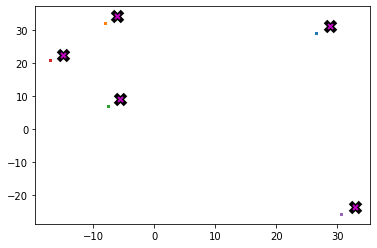

In [76]:
plot_data(centroids+2,X,n_samples)